In [54]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

plt.rcParams['axes.facecolor']='white'
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# Prepare lists to store the flattened images and labels
flattened_images = []
labels = []

# Loop over each file in the directory
for filename in os.listdir("Images"):
    file_path = os.path.join("Images", filename)
    with Image.open(file_path) as img:
        flattened_img = np.array(img).flatten()
        flattened_images.append(flattened_img)
        # Extract the class label from the filename
        # Example filename: yaleB01_P00A+000E+00.png
        # Extract '01' from 'yaleB01', which is the subject ID
        label = filename.split('_')[0]
        label = label[5:7]
        labels.append(label)

# Convert lists to numpy arrays
image_matrix = np.array(flattened_images)
label_array = np.array(labels)

print("Image matrix shape:", image_matrix.shape)
print("Labels array shape:", label_array.shape)

Image matrix shape: (2414, 32256)
Labels array shape: (2414,)


In [188]:
#Alternatively, read from the pickle
import pickle
with open('young_matrix.pkl', 'rb') as file:
    image_matrix = pickle.load(file)

with open('young_labels.pkl', 'rb') as file:
    label_array = np.array(pickle.load(file))

In [189]:
# Unique classes in the dataset
unique_classes = np.unique(labels)

# Initialize lists to hold the split results
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

train_indices = []
test_indices = []

for cls in unique_classes:
    indices = np.where(label_array == cls)[0]
    train_idx, test_idx = train_test_split(indices, train_size=0.75, random_state=42, shuffle=True)
    train_indices.extend(train_idx)
    test_indices.extend(test_idx)

# Use the indices to split both the original and transformed datasets
X_train = image_matrix[train_indices]
X_test = image_matrix[test_indices]
y_train = label_array[train_indices]
y_test = label_array[test_indices]

In [190]:
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [191]:
logistic_classifier = LogisticRegression(random_state = 42, C = 0.005, max_iter = 500)
svm_classifier = SVC(kernel = 'linear', random_state = 42, C = 0.001, max_iter = 500)

In [192]:
component_list = np.arange(1, 202, 10)
logistic_accuracies = []
svm_accuracies = []

for n in component_list:
    pca = PCA(n_components = n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    logistic_accuracies.append(evaluate_model(logistic_classifier, X_train_pca, y_train, X_test_pca, y_test))
    svm_accuracies.append(evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test))

C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\svm\_base.py:299: Convergen

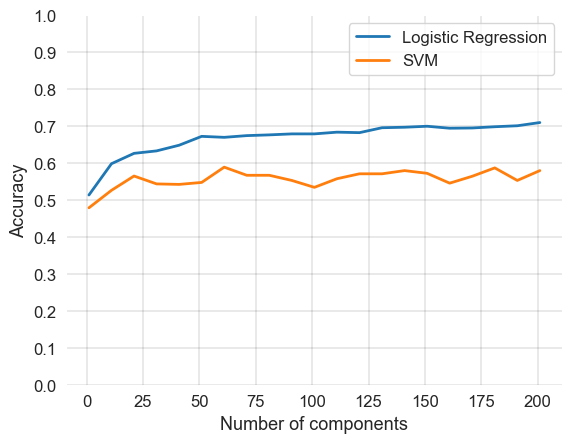

In [193]:
# Using subplots
plt.plot(component_list, logistic_accuracies, label = 'Logistic Regression', linewidth = 2)
plt.plot(component_list, svm_accuracies, label = 'SVM', linewidth = 2)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.grid(color='black', linewidth=0.25, alpha=0.5)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.show()

In [194]:
#pickle the accuracies
import pickle
with open('pca_young_log_accuracies.pkl', 'wb') as file:
    pickle.dump(logistic_accuracies, file)
    
with open('pca_young_svm_accuracies.pkl', 'wb') as file:
    pickle.dump(svm_accuracies, file)